# Table Of Contents:
* [Matplotlib Basics](#mpl_basics)
* [Simple Graph](#simple_graph)
* [Subplots](#subplots)
* [Customization](#customization)
    * [Resizing](#resizing)
    * [Labels and Titles](#labels_titles)
    * [Colors and Styles](#colors_styles)
    * [Markers](#markers)
    * [Annotations](#annotations)
    * [Legends](#legends)
    * [Style Sheets](#ss)
    * [Creating Your Own Style Sheet](#create_ss)
* [Interactive Graph With ipywidgets](#ipyw)
* [Graphing with Pandas](#pandas)
    * [Line Plot](#line_plot)
    * [Histogram](#histogram)
    * [Area Plot](#area)
    * [Bar Plot](#bar)
    * [Pie Chart](#pie)
    * [Hexbin](#hexbin)
* [Seaborn](#seaborn)
    * [Pair Plots](#pair_plots)
    * [Swarm Plots and Custom Palettes](#swarm)
    * [Pokemon Example](#pokemon)
        * [Regression Plots](#regression)
        * [Boxplots (Box and Whisker Plots)](#boxplots)
        * [Heatmap](#heatmap)
        * [Violin Plots](#violin)
* [Cartopy](#cartopy)
* [Time Series](#timeseries)

In [1]:
import pandas as pd
import numpy as np

# Matplotlib Basics <a class="anchor" id="mpl_basics"/>

In [2]:
import matplotlib.pyplot as plt

# Display Graphs within the notebook
%matplotlib inline

## Figures <a class="anchor" id="mpl_figures"/>
In matplotlib the Figure is the container for all of the plotting objects.

## Axes <a class="anchor" id="mpl_axes" />
In the simplest terms an Axes object is a graph. These objects then contain other objects which deal with other parts of the graph (like the labels, title, legend etc.)

# Simple Graph <a class="anchor" id="simple_graph"/>
In the following example we are plotting a simple sine wave. This is done under the covers by using a single Axes object and a Figure object.

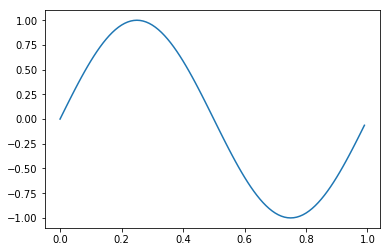

In [3]:
freq = 1.0 # Frequency
x = np.arange(0.0, 1.0, 0.01) # Min, Max, Step
y_sin = [np.sin(2 * np.pi * freq * i) for i in x]

plt.plot(x,y_sin)
plt.show()

# Subplots <a class="anchor" id="subplots"/>
Subplots allow us to plot more than one graph within a Figure using multiple Axes objects.

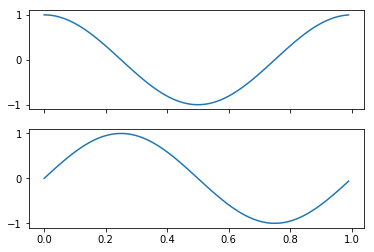

In [4]:
# Define our subplots which will return a tuple of the figure and axes.
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
y_cos = [np.cos(2 * np.pi * freq * i) for i in x]

axes[0].plot(x,y_cos)
axes[1].plot(x,y_sin)
plt.show()

# Customization <a class="anchor" id="customization"/>
There are many ways to customize your graph to your liking. Below are several common ways to customize a graph however this list is not exhaustive. If you'd like to learn more please refer to the matplotlib documentation.

## Resizing <a class="anchor" id="resizing"/>
Resizing is done by utilizing the figsize parameter when defining a Figure object or within the plotting function call itself.

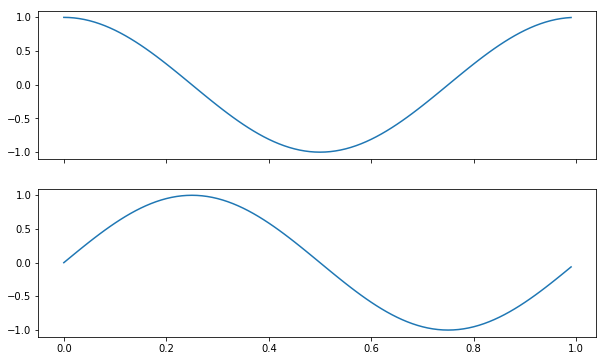

In [5]:
# Define our subplots which will return a tuple of the figure and axes.
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,6))
axes[0].plot(x,y_cos)
axes[1].plot(x,y_sin)
plt.show()

## Labels and Titles <a class="anchor" id="labels_titles"/>

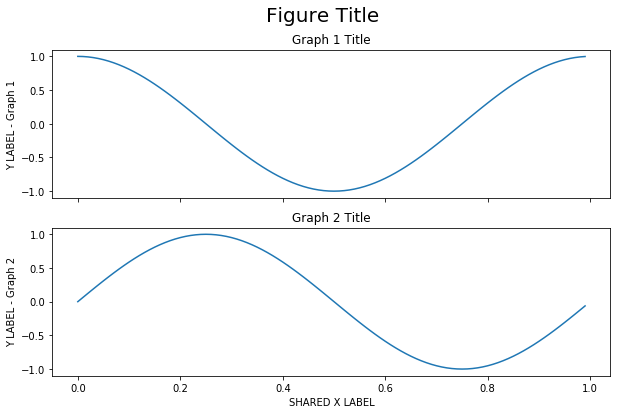

In [6]:
# Define our subplots which will return a tuple of the figure and axes.
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,6))
axes[0].plot(x,y_cos)
axes[1].plot(x,y_sin)

plt.suptitle('Figure Title', fontsize=20, horizontalalignment='center', verticalalignment='top')

axes[0].set_title('Graph 1 Title')
axes[1].set_title('Graph 2 Title')
axes[1].set_xlabel('SHARED X LABEL')
axes[0].set_ylabel('Y LABEL - Graph 1')
axes[1].set_ylabel('Y LABEL - Graph 2')
plt.show()

## Colors and Line Styles <a class="anchor" id="colors_styles"/>
To change the color of your data within your graph you simply need to pass the color parameter to your plotting function. It accepts either a single value or a list of values to cycle through for multiple series.
Matplotlib supports the following ways to specify a color
* as a single letter string, ala MATLAB
* as an html style hex string or html color name
* as an R,G,B[,A] tuple, where R,G,B, range from 0-1
* as a string representing a floating point number from 0 to 1, corresponding to shades of gray.
* as a special color “Cn”, where n is a number 0-9 specifying the nth color in the currently active color cycle.

To change how the line is displayed you can specify the linestyle parameter:
* '-' = Solid line
* '--' = Dashed line
* '-.' = Dash dot
* ':' = Dotted

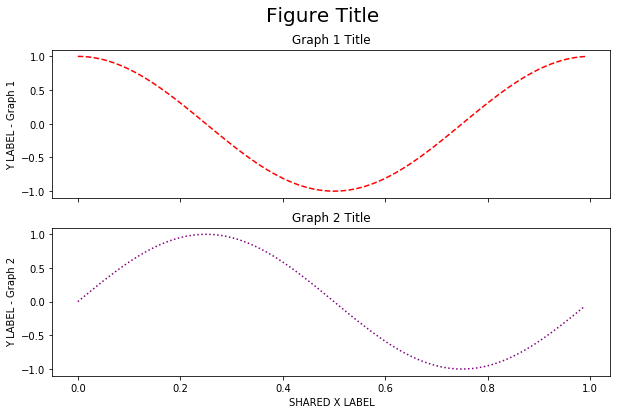

In [7]:
# Define our subplots which will return a tuple of the figure and axes.
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,6))
axes[0].plot(x,y_cos, color='red', linestyle='--')
axes[1].plot(x,y_sin, color='purple', linestyle=':')

# Titles and Labels
plt.suptitle('Figure Title', fontsize=20, horizontalalignment='center', verticalalignment='top')
axes[0].set_title('Graph 1 Title')
axes[1].set_title('Graph 2 Title')
axes[1].set_xlabel('SHARED X LABEL')
axes[0].set_ylabel('Y LABEL - Graph 1')
axes[1].set_ylabel('Y LABEL - Graph 2')

# Show the graph
plt.show()

## Markers <a class="anchor" id="markers"/>
Another way to help customize and differentiate different series of data within a plot is to change the marker (plot point) on the graph.

There are many different options for marker styles. Some options include:
* '*' = Star
* 'D' = Diamond
* '.' = Point
* 'o' = Circle

For a complete list you can refer to the matplotlib [markers documentation](https://matplotlib.org/api/markers_api.html#module-matplotlib.markers) 

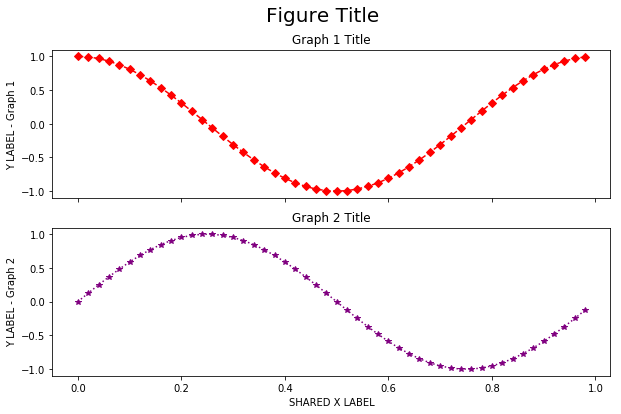

In [8]:
# Define our subplots which will return a tuple of the figure and axes.
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,6))
axes[0].plot(x[::2],y_cos[::2], color='red', linestyle='--', marker='D')
axes[1].plot(x[::2],y_sin[::2], color='purple', linestyle=':', marker='*')

# Titles and Labels
plt.suptitle('Figure Title', fontsize=20, horizontalalignment='center', verticalalignment='top')
axes[0].set_title('Graph 1 Title')
axes[1].set_title('Graph 2 Title')
axes[1].set_xlabel('SHARED X LABEL')
axes[0].set_ylabel('Y LABEL - Graph 1')
axes[1].set_ylabel('Y LABEL - Graph 2')

# Show the graph
plt.show()

## Annotations <a class="anchor" id="annotations"/>
Annotations are a helpful tool to point out specific points of interest within your graph.

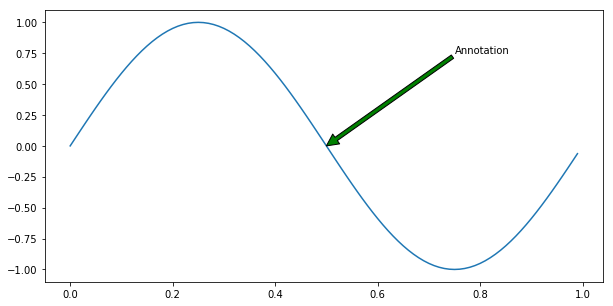

In [9]:
plt.figure(figsize=(10,5));
ax = plt.subplot(1,1,1) # 1x1 subplot - can also pass in 111
plt.plot(x,y_sin)
ax.annotate('Annotation', xy=(0.5, 0.0), xytext=(0.75, 0.75),
            arrowprops={'facecolor':'green'},
            )
plt.show()

## Legends <a class="anchor" id="legends"/>
Legends are a useful tool to help highlight and describe the different sets of data that are being displayed.

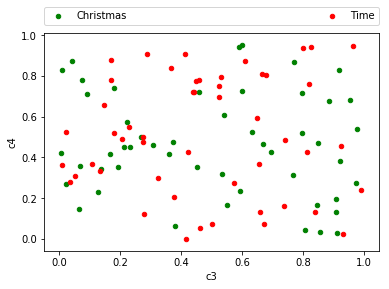

In [10]:
np.random.seed(6)
df1 = pd.DataFrame(np.random.rand(50, 4), columns=['c1', 'c2', 'c3', 'c4'])

np.random.seed(7)
df = pd.DataFrame(np.random.rand(50, 4), columns=['c1', 'c2', 'c3', 'c4'])

# Because we're plotting two seprate pieces of data we need to make sure we specify a color and a label 
#   otherwise they look like the same data!
ax = df.plot.scatter(x='c1', y='c2', color='green', label='Christmas');
df.plot.scatter(x='c3', y='c4', ax=ax, color='red', label='Time');

#Let's also get fancy and put the legend atop the graph by utilizing the bbox_to_anchor parameter
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='upper left',
           ncol=2, # Number of columns to use
           mode="expand", borderaxespad=0.0);

## Style Sheets <a class="anchor" id="ss"/>
Matplotlib has several different predefined styles to make your graph look pretty. You can set it permanently by calling:
```
plt.style.use('stylename')
```

If you'd prefer to set it temporarily for a single graph you can use a context:
```
with plt.syle.context('stylename'):
    plot_something()
```

## Creating Your Own Style Sheet <a class="anchor" id="create_ss"/>
Matplotlib allows you to define your own style sheets in an mplstyle file in the matplotlib config directory. It follows the same format as a [matplotlib rc file](https://matplotlib.org/users/customizing.html#matplotlibrc-sample).

You can determine what your configuration directory is set to by using:
```
matplotlib.get_configdir()
```

For example *my_style.mplstyle*:
```
text.color : red
axes.facecolor : green
ytick.color : pink
xtick.color : brown
lines.linewidth : 2
legend.loc : best
```

# Interactive Graph with ipywidgets <a class="anchor" id="ipyw"/>
The ipywidgets package allows you to add interactive graphs to your notebook using different types of widgets (drop down boxes, sliders etc). As this is interactive it must be served in order to respond to the requests. Jupyter handles this automatically for you if you're running it locally however they won't function if you're viewing them through GitHub.

In [11]:
from ipywidgets import interact, interactive, fixed, IntSlider, Dropdown

In [12]:
def graph_with_style(style_name):
    x = np.arange(0.0, 1.0, 0.01) # Min, Max, Step
    y = [np.sin(2 * np.pi * 2 * i) for i in x]
    with plt.style.context(style_name):
        plt.plot(x,y)
        plt.show()

In [13]:
dd = Dropdown(options=plt.style.available)

interact(graph_with_style, style_name=dd);

A Jupyter Widget

In [14]:
def display_graph(func, freq=1.0):
    x = np.arange(0.0, 1.0, 0.01) # Min, Max, Step
    y = [func(2 * np.pi * freq * i) for i in x]
    plt.plot(x,y)
    plt.show()

In [15]:
dd = Dropdown(options={'Sine':np.sin,'Cosine':np.cos})
# Set continuous_update=False so that we're not consuming resources constantly
# by updating the graph when the slider is moved. Only update when it's released.
fs = IntSlider(min=1, max=10, step=1, continuous_update=False)
interact(display_graph, func=dd, freq=fs);

A Jupyter Widget

# Graphing with Pandas <a class="anchor" id="pandas"/>
Pandas is built on top of matplotlib. Because of this it allows us to call plotting methods directly from our DataFrames plot property.

We'll take a look at some graph types here but to view a full list of what pandas is capable of refer to their documentation here: [http://pandas.pydata.org/pandas-docs/stable/visualization.html](http://pandas.pydata.org/pandas-docs/stable/visualization.html)

## Line Plot <a class="anchor" id="line_plot"/>
Line plots are useful when you want to show how one quantity changes as another one does. For instance how a stock price changes over time.

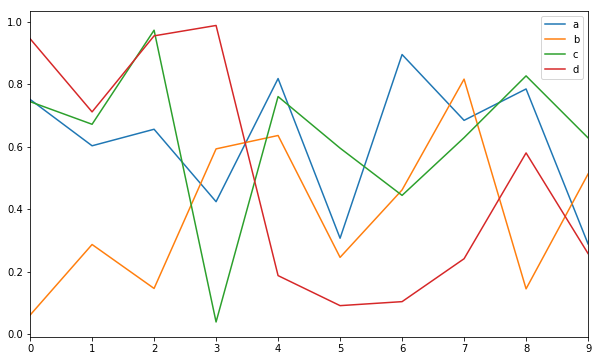

In [16]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot(figsize=(10,6));

## Histogram <a class="anchor" id="histogram"/>
Histograms are a way to display the frequency or counts of data which has been broken down into different bins. These are useful when you have a large amount of categories which your data falls into.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114e13cf8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1112db550>]], dtype=object)

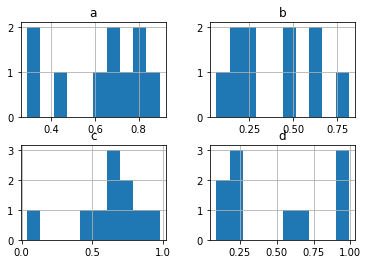

In [17]:
# Handy Jupyter Notebook tip:
# - Add a semicolon to the end of the line to avoid returning extra information
# - Alternatively you can use the special _ variable and #set that to your graph.
# iris.hist();
# _ = iris.hist()
plt.figure(figsize=(10,6))
df.hist()

## Area plot <a class="anchor" id="area"/>
Area plots are similar to line charts in that they plot one quantity's change in relation to another however the area below the line is filled in. They are useful to represent cumulative totals among related attributes. 

An exmaple of an area plot usage would be CPU usage on a server broken down by processes.

By default they are stacked but can be unstacked by specifying stacked=False.

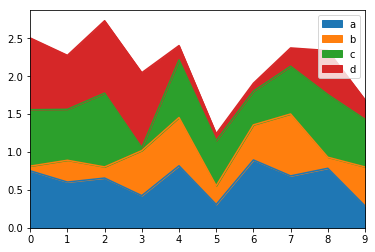

In [18]:
df.plot.area();

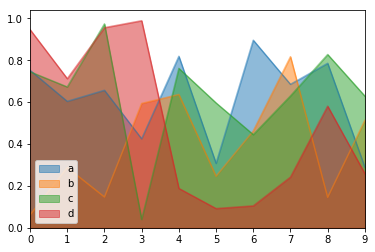

In [19]:
df.plot.area(stacked=False);

## Bar Plots <a class="anchor" id="bar"/>
Bar plots are used to show a comparison of discrete values.

### Vertical

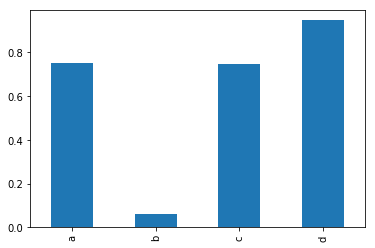

In [20]:
df.iloc[0].plot.bar();

### Horizontal

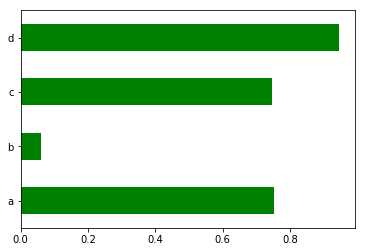

In [21]:
df.iloc[0].plot.barh(color='green')

## Pie Chart <a class="anchor" id="pie"/>
Pie charts are used to show the different parts of a whole.

An example of a pie chart would be the demographic breakdown of a population (male vs female students)

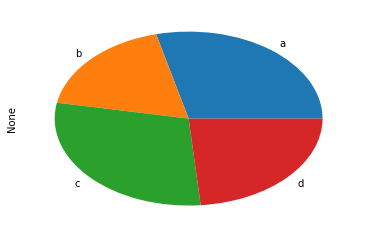

In [22]:
df.sum().plot.pie()

## Hexbin <a class="anchor" id="hexbin"/>
Useful alternative to scatter plots if you have very dense data

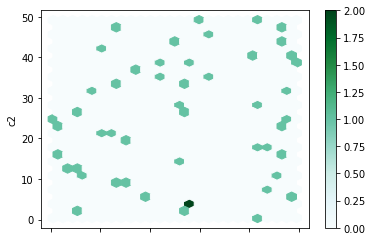

In [23]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['c1', 'c2', 'c3', 'c4'])
df['c2'] = df['c2'] + np.arange(50)
df.plot.hexbin(x='c1', y='c2', gridsize=25);

# Seaborn <a class="anchor" name="seaborn"/>
*If matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too.*

These include:
- Using default themes that are aesthetically pleasing
- Setting and using custom color pallete
- Making attractive statistical plots

API Reference:
http://seaborn.pydata.org/api.html

Seaborn is a **complement**, not a substitute for Matplotlib. Some tweaks to visualizations still require Matplotlib.



In [24]:
import seaborn as sns

iris = sns.load_dataset('iris')

## Pair Plots <a class="anchor" id="pair_plots"/>
- Compare all combinations  separate features / attributes within a DataFrame by utilizing scatter plots.
- Across the diagonal are histograms of each feature.
- Useful in exploratory data analysis to quickly visualize the relationship between different features.

#### The Really Long Way

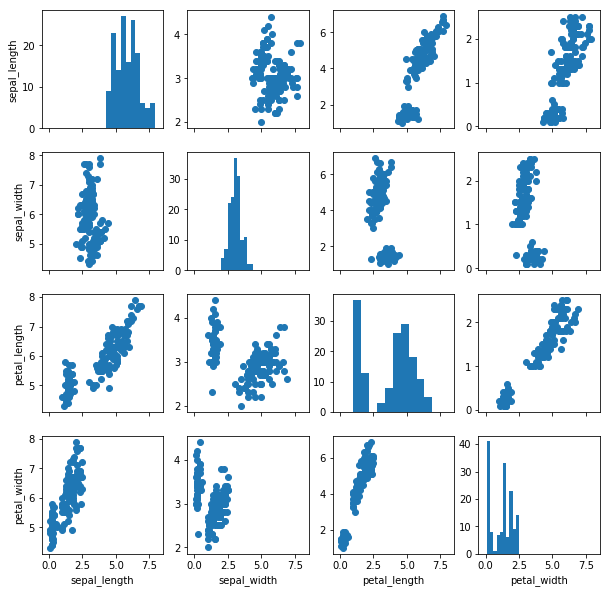

In [25]:
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, figsize=(10,10))
# Plot histograms across the diagonal
axes[0,0].hist(iris['sepal_length'])
axes[1,1].hist(iris['sepal_width'])
axes[2,2].hist(iris['petal_length'])
axes[3,3].hist(iris['petal_width'])

# Sepal Length scatter plots
axes[0,1].scatter(iris['sepal_length'], iris['sepal_width'])
axes[0,2].scatter(iris['sepal_length'], iris['petal_length'])
axes[0,3].scatter(iris['sepal_length'], iris['petal_width'])


# Sepal Width scatter plots
axes[1,0].scatter(iris['sepal_width'], iris['sepal_length'])
axes[1,2].scatter(iris['sepal_width'], iris['petal_length'])
axes[1,3].scatter(iris['sepal_width'], iris['petal_width'])


# Petal Length scatter plots
axes[2,0].scatter(iris['petal_length'], iris['sepal_length'])
axes[2,1].scatter(iris['petal_length'], iris['sepal_width'])
axes[2,3].scatter(iris['petal_length'], iris['petal_width'])


# Petal Width scatter plots
axes[3,0].scatter(iris['petal_width'], iris['sepal_length'])
axes[3,1].scatter(iris['petal_width'], iris['sepal_width'])
axes[3,2].scatter(iris['petal_width'], iris['petal_length'])


# Set axis labels
axes[0,0].set_ylabel('sepal_length')
axes[1,0].set_ylabel('sepal_width')
axes[2,0].set_ylabel('petal_length')
axes[3,0].set_ylabel('petal_width')
axes[3,0].set_xlabel('sepal_length')
axes[3,1].set_xlabel('sepal_width')
axes[3,2].set_xlabel('petal_length')
axes[3,3].set_xlabel('petal_width')

plt.show()

#### The shorter pandas way

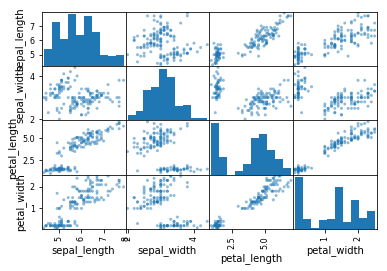

In [26]:
pd.plotting.scatter_matrix(iris);

#### With Seaborn

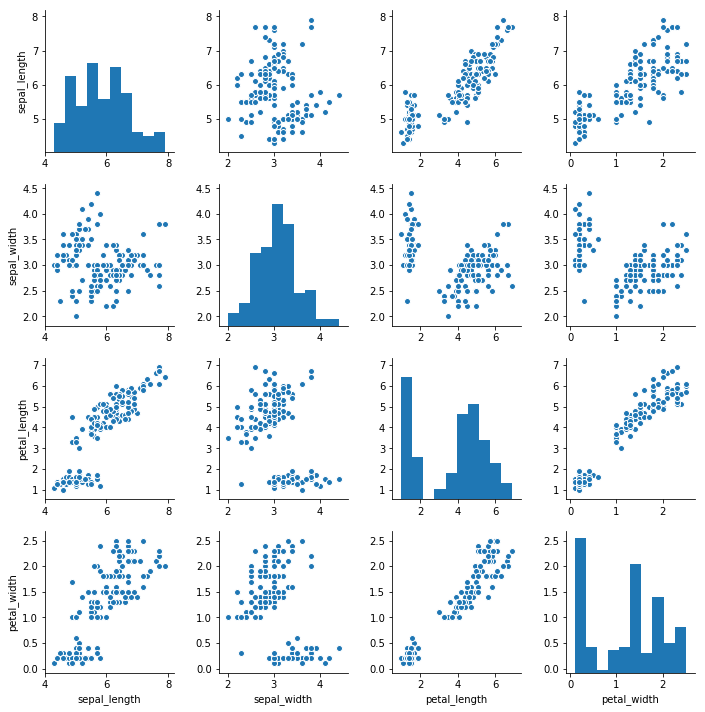

In [27]:
sns.pairplot(iris);

## Swarm Plots and Custom Palettes <a class="anchor" id="swarm"/>
- Show all observations among different groups within your data.
- Doesn't handle large amounts of data well.

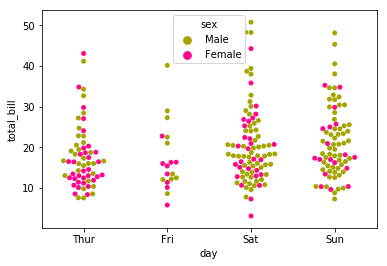

In [28]:
tips = sns.load_dataset('tips')

colors = ['puke', 'strong pink'] # http://xkcd.com/color/rgb/
pal = sns.xkcd_palette(colors)
with sns.color_palette(pal):
    sns.swarmplot(data=tips, x="day", y="total_bill", hue="sex")
    # Let's save this graph as an image since it's so beautiful.
    plt.savefig('puke_pink.png');

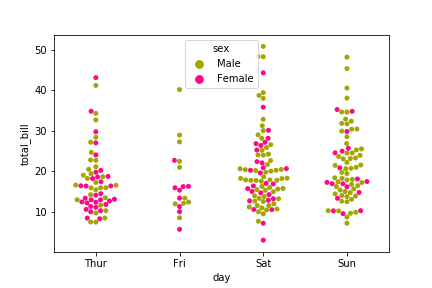

In [29]:
# Display the saved image within the notebook
from IPython.display import Image
Image("puke_pink.png")

## Pokemon Example <a class="anchor" id="pokemon"/>

In [30]:
df = pd.read_csv('data/Pokemon.csv', index_col=0)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


### Regression Plots <a class="anchor" id="regression"/>
- Good visual guide to help highlight patterns in a dataset for exploratory data analysis

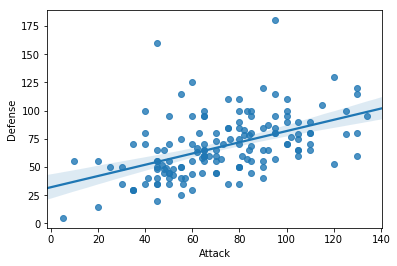

In [31]:
sns.regplot(x='Attack', y='Defense', data=df);

### Boxplots (Box and Whisker Plots) <a class="anchor" id="boxplots"/>
Creates a graph showing boxes with lines extending out from the boxes ("whiskers"). The box represents the quartiles (25th, 50th/median and 75th). The whiskers extend out by default to 1.5 * IQR (Interquartile Range -- 75th-25th)

- Useful to explore the range of values in your data
- Handles large amount of data

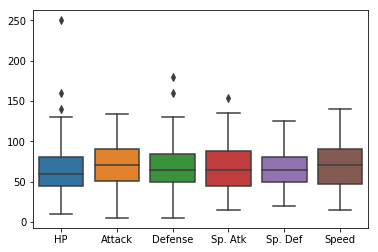

In [32]:
# Only use the features we're interested in and drop the rest
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
sns.boxplot(data=stats_df);


## Heatmap <a class="anchor" id="heatmap"/>
- Helps visualize matrix-like data like correlations between two different variables.

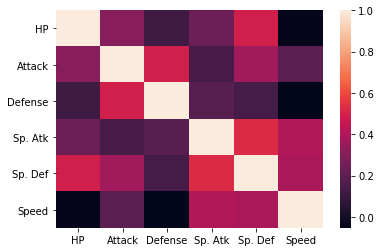

In [33]:
corr = stats_df.corr() # Get correlation data
sns.heatmap(corr);

### Violin Plots <a class="anchor" id="violin"/>
- They look like violins
- Good alternative to box plots
- Where boxplots only show summary statistics, violin plots additionally show distribution in the thickness of the violin
- Able to handle large amounts of data

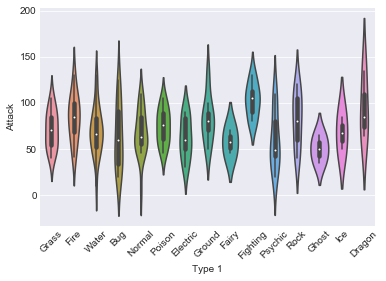

In [34]:
# Set theme
sns.set_style('darkgrid')
 
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)
plt.xticks(rotation=45);

### Custom Palettes <a class="anchor" id="custom_palettes"/>
This graph is nice but it would be easier to relate to each violin if the color reflected the type (for example Green for Grass). Luckily Seaborn allows us to define a customized palette to use.

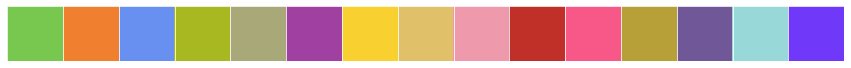

In [35]:
pokemon_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

# Let's visualize our newly customized color palette.
# We can use the handy seaborn palette plot method (palplot)
sns.palplot(pokemon_type_colors)

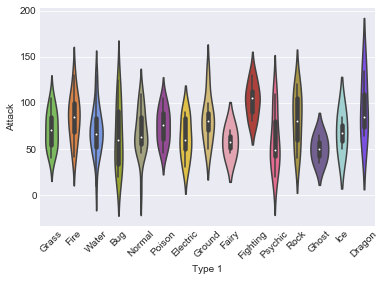

In [36]:
g = sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pokemon_type_colors) # Set color palette
plt.xticks(rotation=45); # rotate x-axis labels - Improve readability

Violin plots are good for showing a general overview of a dataset especially if there's a large amount of data. In this case since we only have 151 data points we could utilize a swamplot to get a more detailed picture. Even better would be to overlay a swarmplot on top of the violin plot.

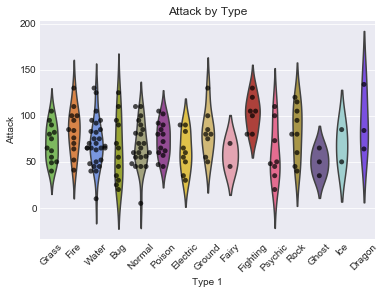

In [37]:
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pokemon_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type');
plt.xticks(rotation=45); # rotate x-axis labels - Improve readability

# Cartopy <a class="anchor" id="cartopy"/>
Cartopy is a useful tool which can allow you to plot geographical data onto an actual map.

As Cartopy is highly configurable we'll just take a quick peek at a very simple examples but you are encouraged to reivew the Cartopy documentation at [http://scitools.org.uk/cartopy/docs/latest/index.html](http://scitools.org.uk/cartopy/docs/latest/index.html)

NOTE: This package isn't included within the standard anaconda distribution. You'll need to install it manually using:
```
conda install cartopy
```

Matplotlib also has a related package called BaseMap however it is no longer actively developed and is only supported until 2020. Cartopy is the recommended replacement but there are many others out there as well.

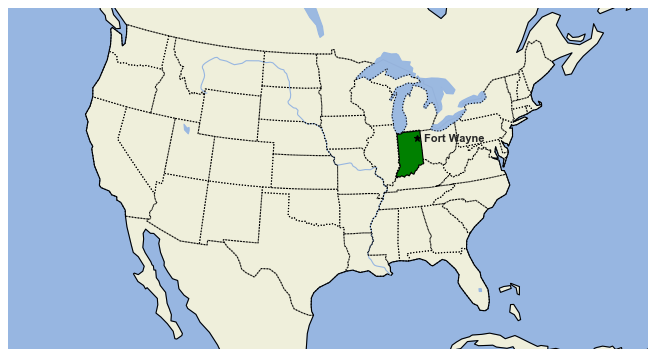

In [38]:
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
from shapely.geometry import Point # Convert lat and long to shapely object to determine intersection

# Initialize our plotting figure to be 8 inches by 6 inches at 80 dpi
# - This correlates to 640x480 pixels
fig = plt.figure(figsize=(8,6), dpi=80)

# CRS = coordinate reference system
# - Methods to project the Earth's surgace onto the screen.

# Get the shape reader to determine the shape of each state from NaturalEarthData.com
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

east, west, north, south = -66.5, -125, 50, 20 # Narrow down our map

fw_lat, fw_lon = 41.079273, -85.139351
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

# Zoom into show only the United States by specifying a the latitude and longitudes
ax.set_extent([west, east, south, north], ccrs.Geodetic())

# to get the effect of having just the states without a map "background"
# turn off the outline and background patches
ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.add_feature(cartopy.feature.LAKES, alpha=0.95)
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.STATES, linestyle=':')

plt.plot(fw_lon, fw_lat,
         color='black', linewidth=2, marker='*',
         transform=ccrs.Geodetic(),
         )

plt.text(fw_lon+.75, fw_lat-0.4, 'Fort Wayne', transform = ccrs.Geodetic(), weight='bold');
for state in shpreader.Reader(states_shp).geometries():
    # pick a default color for the land with a black outline,
    # this will change if the storm intersects with our track
    facecolor = [0.9375, 0.9375, 0.859375]
    edgecolor = 'black'

    if state.intersects(Point(fw_lon, fw_lat)):
        facecolor = 'green'
        ax.add_geometries([state], ccrs.PlateCarree(),
                  facecolor=facecolor, edgecolor=edgecolor)
        


# Time Series <a class="anchor" id="timeseries"/>
[http://pandas.pydata.org/pandas-docs/stable/timeseries.html](http://pandas.pydata.org/pandas-docs/stable/timeseries.html)

Pandas has 4 different classes to represent time data:
* Timestamp - Represents a single timestamp
* DateTimeIndex - Index of Timestamp
* Period - Represents a single time span
* PeriodIndex - Index of Period

## DateTimeIndex
DateTimeIndex objects have all of the same features as a regular Index object however there are several additional performance enhancements for using a DateTimeIndex to represent time data.

Additional benefits include:
* You can access the date properties (year, month, day etc) quickly.
* Supports partial date slicing - Get data for a specific year
* Plotting with Pandas will automatically format dates on the axis labels

In [39]:
from pandas_datareader.data import DataReader
from datetime import datetime, timedelta

In [40]:
# Let's get stock data for the past year for Apple (AAPL)
end, start = datetime.today(), datetime.today() - timedelta(days=365)

# Utilize the pandas Data Reader to read stock quote from iex.
# Google and Yahoo used to provide this information as well 
#   however because of API changes and usage terms they have been deprecated
df_stocks = DataReader('AAPL', 'iex', start=start, end=end)
df_stocks.head()

2y


,open,high,low,close,volume
date,,,,,
2017-05-10,151.2373,151.5425,149.7410,150.8731,25805692
2017-05-11,150.6952,152.2966,150.5568,152.1779,27255058
2017-05-12,152.9193,154.6195,152.8897,154.3032,32527017
2017-05-15,154.2142,154.8469,153.2653,153.9078,26009719
2017-05-16,154.1450,154.2637,152.9391,153.6804,20048478


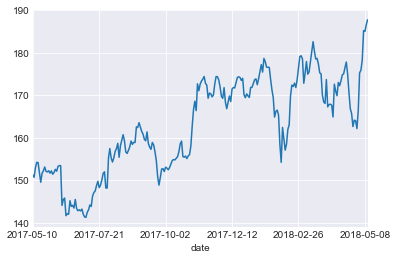

In [41]:
df_stocks['open'].plot();

In [42]:
df_stocks.index

Index(['2017-05-10', '2017-05-11', '2017-05-12', '2017-05-15', '2017-05-16',
       '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-22', '2017-05-23',
       ...
       '2018-04-27', '2018-04-30', '2018-05-01', '2018-05-02', '2018-05-03',
       '2018-05-04', '2018-05-07', '2018-05-08', '2018-05-09', '2018-05-10'],
      dtype='object', name='date', length=253)

That's odd... The data we get back isn't in a TimeSeries. We can easily convert it.

In [43]:
df_stocks.index = pd.to_datetime(df_stocks.index)
df_stocks.index

DatetimeIndex(['2017-05-10', '2017-05-11', '2017-05-12', '2017-05-15',
               '2017-05-16', '2017-05-17', '2017-05-18', '2017-05-19',
               '2017-05-22', '2017-05-23',
               ...
               '2018-04-27', '2018-04-30', '2018-05-01', '2018-05-02',
               '2018-05-03', '2018-05-04', '2018-05-07', '2018-05-08',
               '2018-05-09', '2018-05-10'],
              dtype='datetime64[ns]', name='date', length=253, freq=None)

In [44]:
df_stocks.index.year

Int64Index([2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
            ...
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
           dtype='int64', name='date', length=253)

## Slicing
Another benefit of DateTimeIndex objects is that you can do partial date string slicing.

For example if we wanted to look at the data from just this year:

In [45]:
df_stocks[str(datetime.now().year)].head()
# Alternatively df_stocks['2018']

,open,high,low,close,volume
date,,,,,
2018-01-02,169.4690,171.6003,168.5726,171.5605,25555934
2018-01-03,171.8294,173.8412,171.2617,171.5306,29517899
2018-01-04,171.8393,172.7655,171.3812,172.3273,22434597
2018-01-05,172.7357,174.6578,172.3472,174.2893,23660018
2018-01-08,173.6420,174.8968,173.2237,173.6420,20567766


In [46]:
# Alternatively look at data for just this month:
mask = str(datetime.now().year) + '-' + str(datetime.now().month)
df_stocks[mask].head()
# df['2018-4']

,open,high,low,close,volume
date,,,,,
2018-05-01,166.4102,169.20,165.2700,169.10,53569376
2018-05-02,175.2250,177.75,173.8000,176.57,66539371
2018-05-03,175.8800,177.50,174.4411,176.89,34068180
2018-05-04,178.2500,184.25,178.1700,183.83,56201317
2018-05-07,185.1800,187.67,184.7500,185.16,42451423


## Resample
The really neat thing with utilizing a datetime index (a TimeSeries) is you can easily resample your data so that you can aggregate your data based on a specific unit of time. In the example below we're using the end of the month but several more options are available under the offset documentation found at http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

In [47]:
resampled = df_stocks.resample('M').median()
resampled.head()

,open,high,low,close,volume
date,,,,,
2017-05-31,152.06920,152.57330,151.1499,151.90120,24451164.0
2017-06-30,144.63575,145.32275,143.3557,144.17115,26158643.5
2017-07-31,147.29480,148.45135,146.0295,147.55185,20527515.0
2017-08-31,157.85650,159.24590,156.8146,158.23740,26368528.0
2017-09-30,158.03520,158.64550,156.7922,157.43975,29073924.5


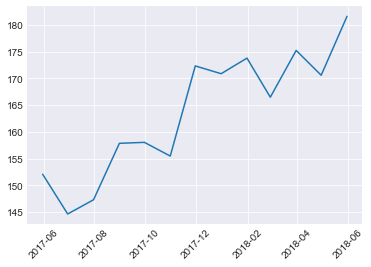

In [48]:
plt.plot(resampled['open']);
# Angle the X-axis labels for better readability
plt.xticks(rotation=45);
plt.show();

## Limitations
Since DateTime objects are represented as int64 integers to the nanosecond level the time span that can be represented is roughly 564 years

In [49]:
pd.Timestamp.min

Timestamp('1677-09-21 00:12:43.145225')

In [50]:
pd.Timestamp.max

Timestamp('2262-04-11 23:47:16.854775807')